In [17]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler

# ========== Step 1: Load Dataset ==========
df = pd.read_csv("data_imu_oke.csv")
channels = ['ax', 'ay', 'az', 'gx', 'gy', 'gz']

# ========== Step 2: Cast to Float ==========
for ch in channels:
    df[ch] = pd.to_numeric(df[ch], errors='coerce')

# ========== Step 3: Mask Extreme Values ==========
def mask_extreme_values(data, threshold=1e6):
    df_ext = data.copy()
    for ch in channels:
        df_ext[ch] = df_ext[ch].mask(df_ext[ch].abs() > threshold)
    return df_ext

df_clean = mask_extreme_values(df)

# ========== Step 4: Interpolation (Handle NaNs) ==========
df_clean[channels] = df_clean[channels].interpolate(method='linear', limit_direction='both')

# ========== Step 5: Z-score Outlier Detection ==========
z_scores = df_clean[channels].apply(zscore)
outliers = z_scores.abs() > 3
df_clean[channels] = df_clean[channels].mask(outliers)
df_clean[channels] = df_clean[channels].interpolate(method='linear', limit_direction='both')

# ========== Step 6: Standardization ==========
scaler = StandardScaler()
df_scaled = df_clean.copy()
df_scaled[channels] = scaler.fit_transform(df_clean[channels])

# ========== Step 7: Feature Extraction per Window ==========
def extract_features(df_in, window_size=100):
    feats = []
    for i in range(0, len(df_in) - window_size + 1, window_size):
        win = df_in.iloc[i:i+window_size]
        f = {f"{ch}_{stat}": getattr(win[ch], stat)()
             for ch in channels for stat in ['mean', 'std', 'max', 'min']}
        f['label'] = win['label'].mode().values[0]
        feats.append(f)
    return pd.DataFrame(feats)

df_features = extract_features(df_scaled, window_size=100)

# ========== Step 8: Output to CSV (Opsional) ==========
df_features.to_csv("imu_features_cleaned.csv", index=False)


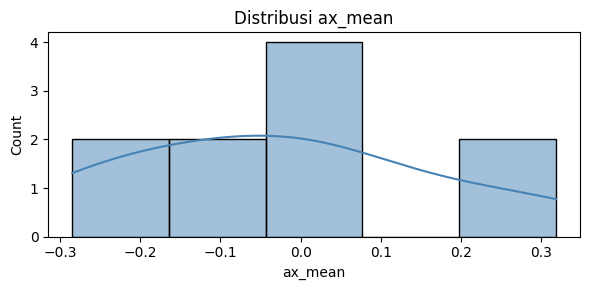

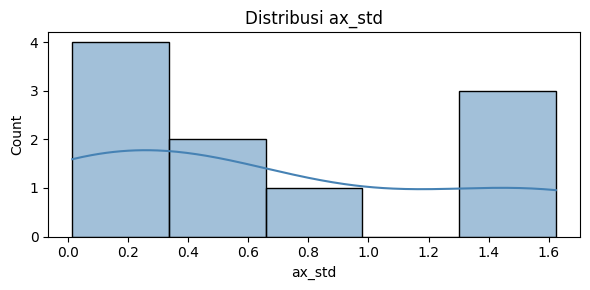

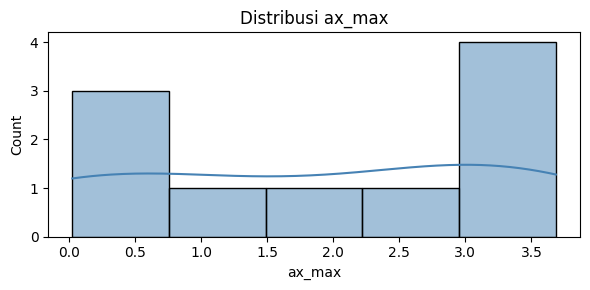

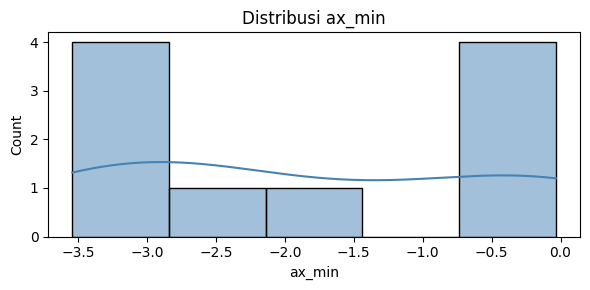

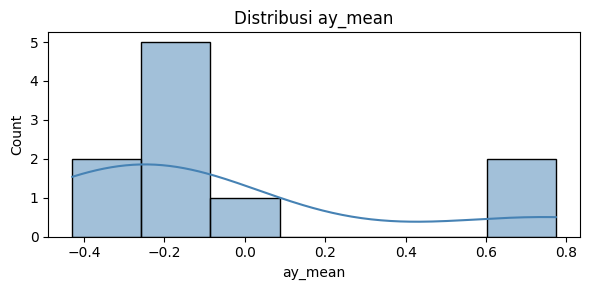

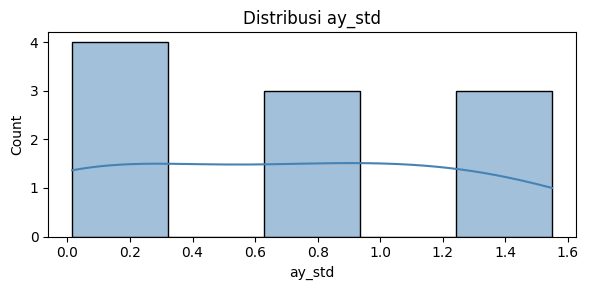

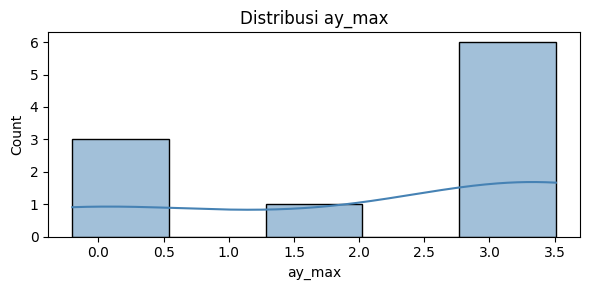

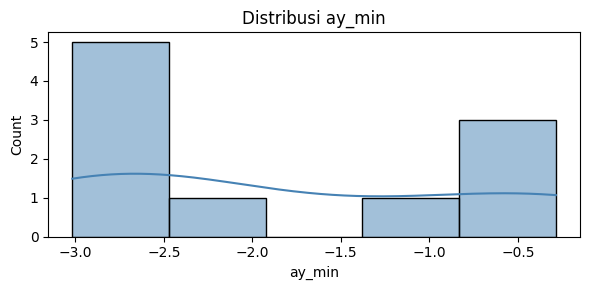

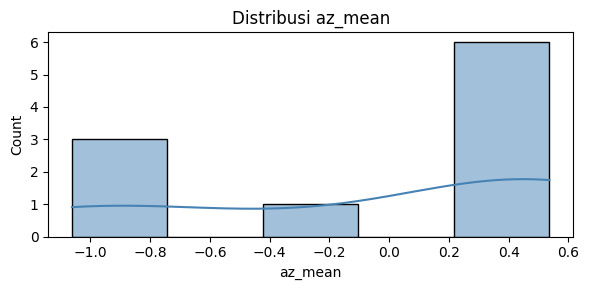

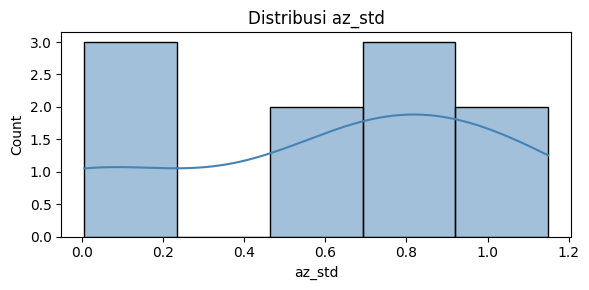

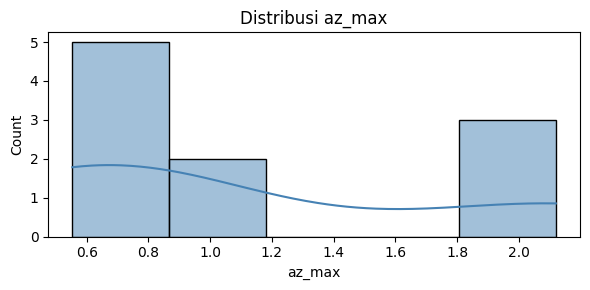

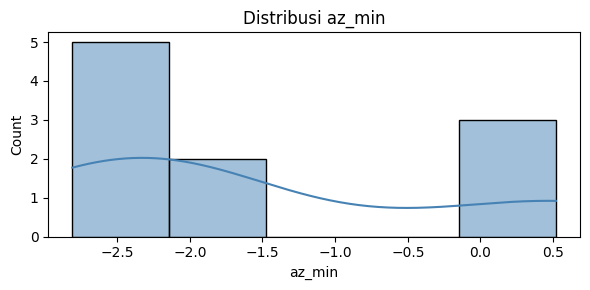

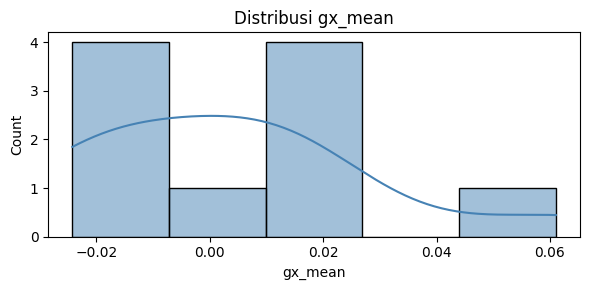

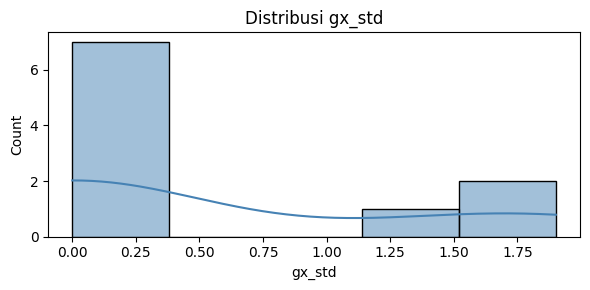

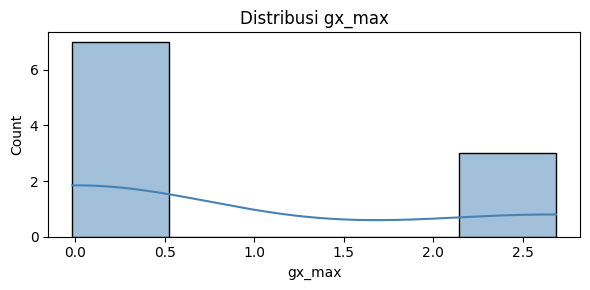

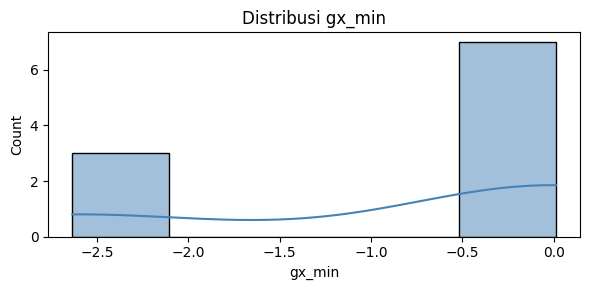

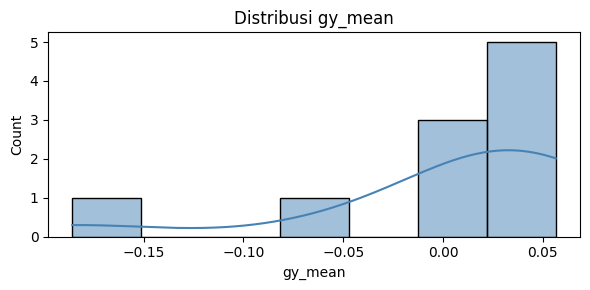

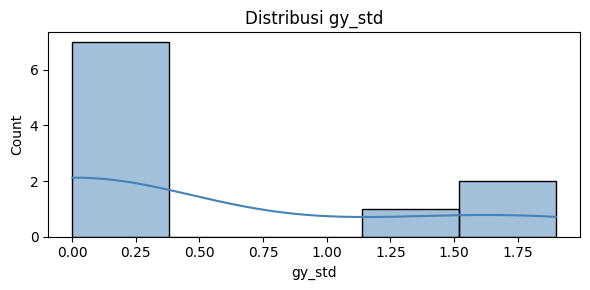

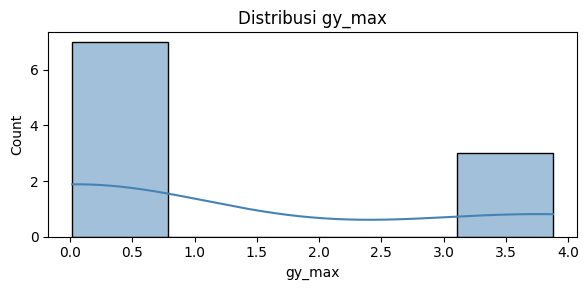

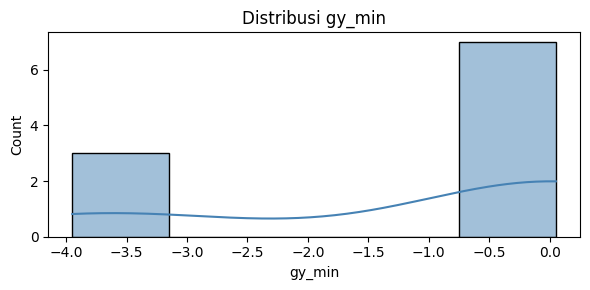

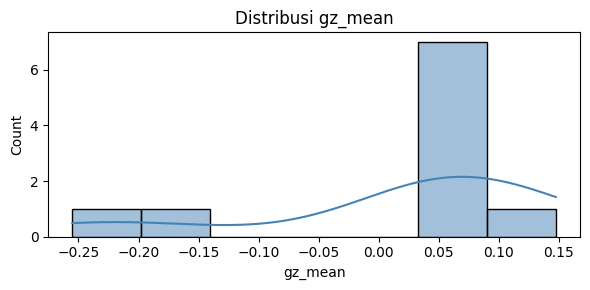

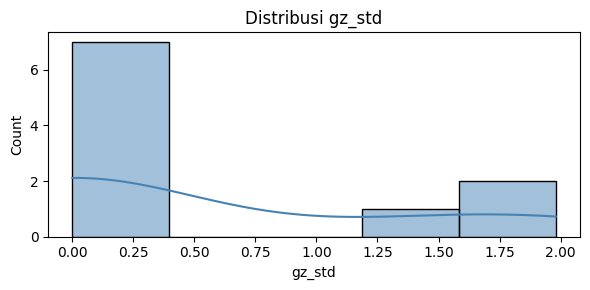

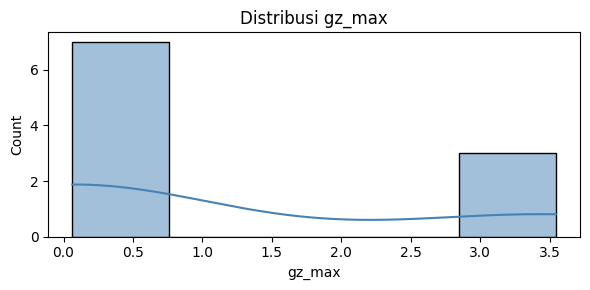

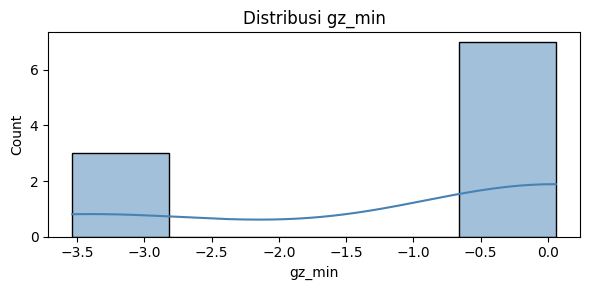

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribusi semua fitur statistik
for col in df_features.columns:
    if col != 'label':
        plt.figure(figsize=(6, 3))
        sns.histplot(df_features[col], kde=True, color='steelblue')
        plt.title(f'Distribusi {col}')
        plt.xlabel(col)
        plt.tight_layout()
        plt.show()


/var/folders/lt/2mkl6ry53ll9fdk2br6skfgw0000gn/T/ipykernel_19222/232653088.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=col, data=df_features, palette='coolwarm')


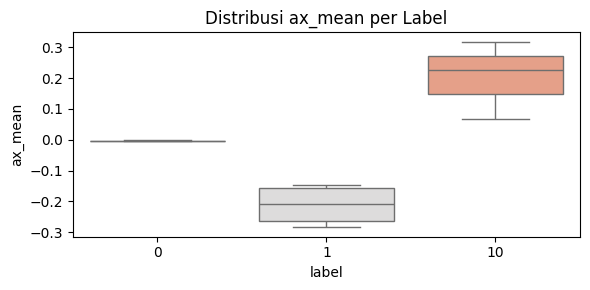

/var/folders/lt/2mkl6ry53ll9fdk2br6skfgw0000gn/T/ipykernel_19222/232653088.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=col, data=df_features, palette='coolwarm')


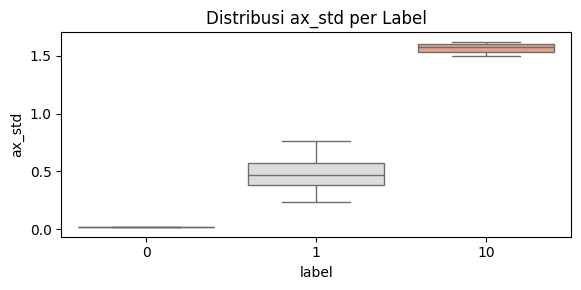

/var/folders/lt/2mkl6ry53ll9fdk2br6skfgw0000gn/T/ipykernel_19222/232653088.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=col, data=df_features, palette='coolwarm')


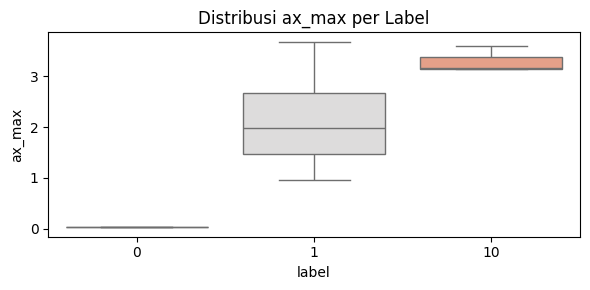

/var/folders/lt/2mkl6ry53ll9fdk2br6skfgw0000gn/T/ipykernel_19222/232653088.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=col, data=df_features, palette='coolwarm')


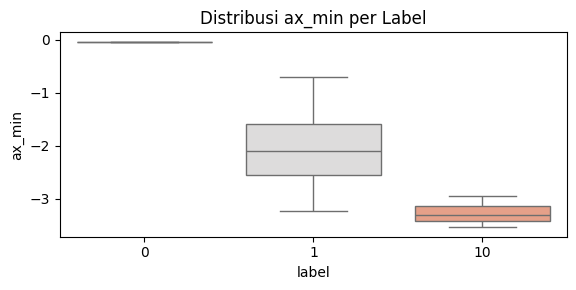

/var/folders/lt/2mkl6ry53ll9fdk2br6skfgw0000gn/T/ipykernel_19222/232653088.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=col, data=df_features, palette='coolwarm')


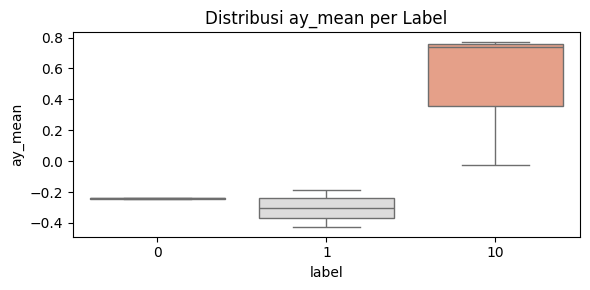

/var/folders/lt/2mkl6ry53ll9fdk2br6skfgw0000gn/T/ipykernel_19222/232653088.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=col, data=df_features, palette='coolwarm')


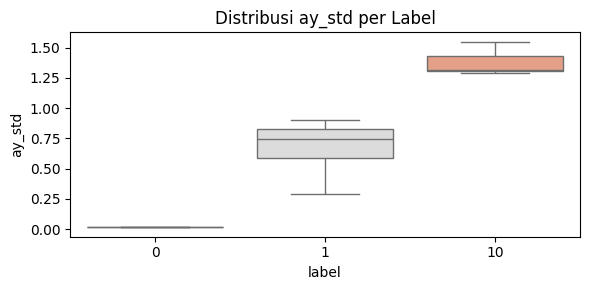

/var/folders/lt/2mkl6ry53ll9fdk2br6skfgw0000gn/T/ipykernel_19222/232653088.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=col, data=df_features, palette='coolwarm')


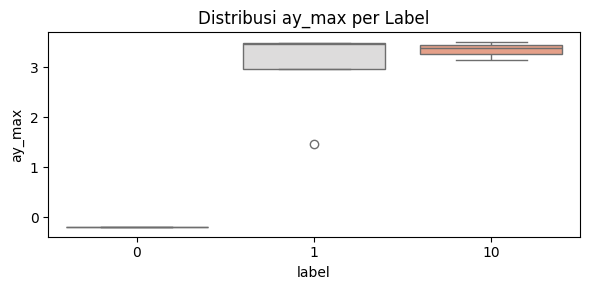

/var/folders/lt/2mkl6ry53ll9fdk2br6skfgw0000gn/T/ipykernel_19222/232653088.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=col, data=df_features, palette='coolwarm')


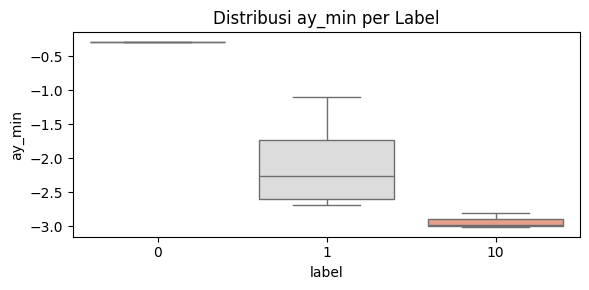

/var/folders/lt/2mkl6ry53ll9fdk2br6skfgw0000gn/T/ipykernel_19222/232653088.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=col, data=df_features, palette='coolwarm')


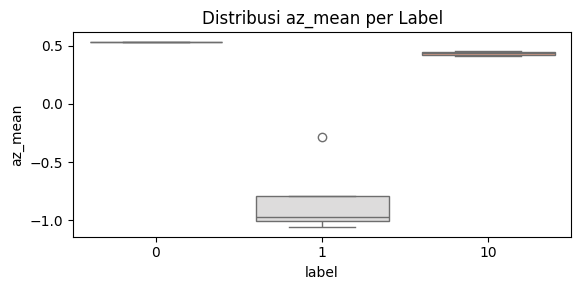

/var/folders/lt/2mkl6ry53ll9fdk2br6skfgw0000gn/T/ipykernel_19222/232653088.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=col, data=df_features, palette='coolwarm')


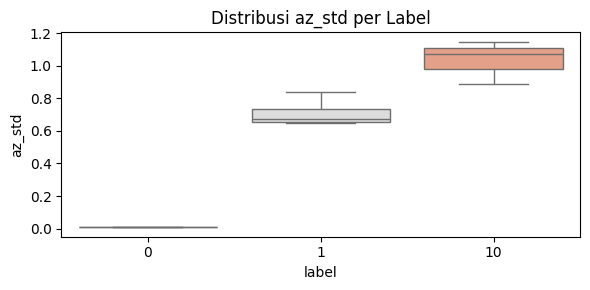

/var/folders/lt/2mkl6ry53ll9fdk2br6skfgw0000gn/T/ipykernel_19222/232653088.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=col, data=df_features, palette='coolwarm')


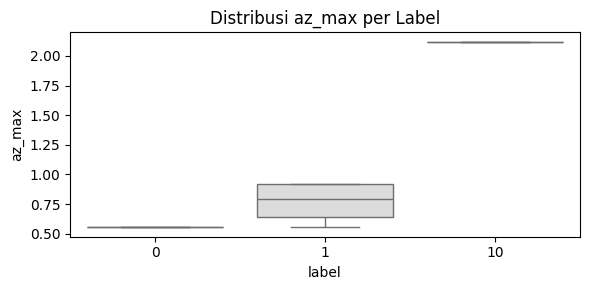

/var/folders/lt/2mkl6ry53ll9fdk2br6skfgw0000gn/T/ipykernel_19222/232653088.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=col, data=df_features, palette='coolwarm')


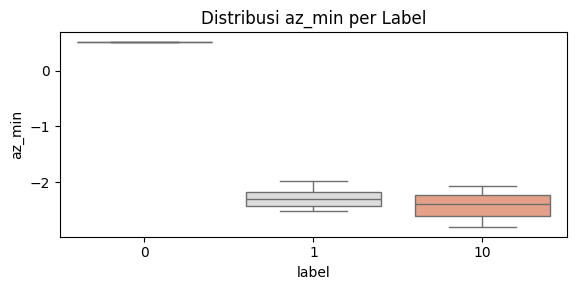

/var/folders/lt/2mkl6ry53ll9fdk2br6skfgw0000gn/T/ipykernel_19222/232653088.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=col, data=df_features, palette='coolwarm')


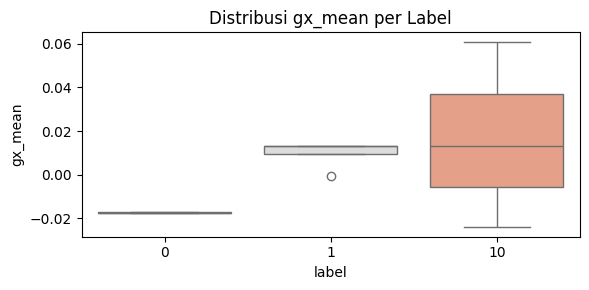

/var/folders/lt/2mkl6ry53ll9fdk2br6skfgw0000gn/T/ipykernel_19222/232653088.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=col, data=df_features, palette='coolwarm')


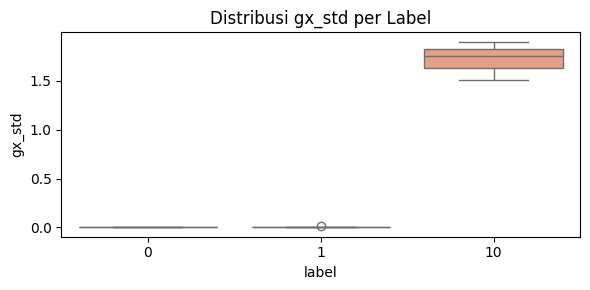

/var/folders/lt/2mkl6ry53ll9fdk2br6skfgw0000gn/T/ipykernel_19222/232653088.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=col, data=df_features, palette='coolwarm')


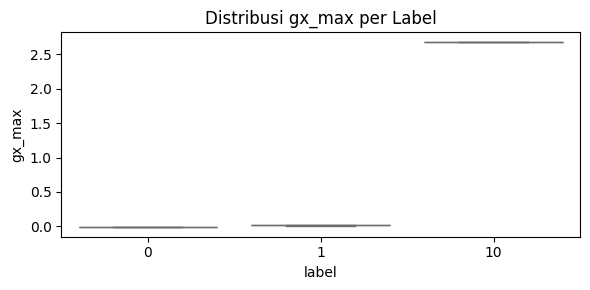

/var/folders/lt/2mkl6ry53ll9fdk2br6skfgw0000gn/T/ipykernel_19222/232653088.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=col, data=df_features, palette='coolwarm')


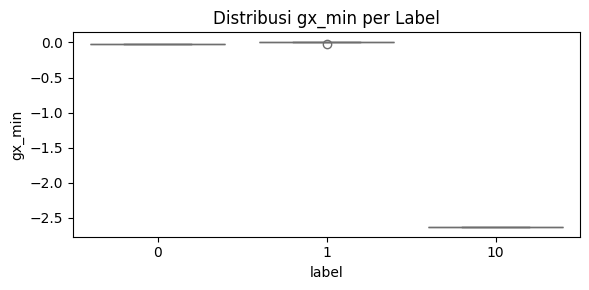

/var/folders/lt/2mkl6ry53ll9fdk2br6skfgw0000gn/T/ipykernel_19222/232653088.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=col, data=df_features, palette='coolwarm')


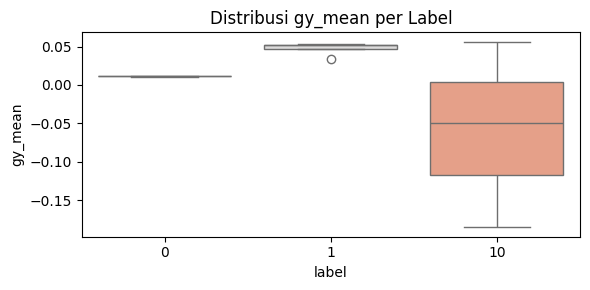

/var/folders/lt/2mkl6ry53ll9fdk2br6skfgw0000gn/T/ipykernel_19222/232653088.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=col, data=df_features, palette='coolwarm')


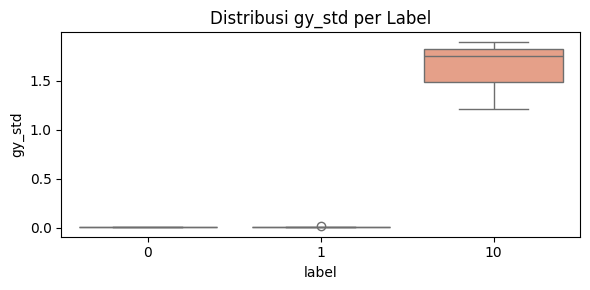

/var/folders/lt/2mkl6ry53ll9fdk2br6skfgw0000gn/T/ipykernel_19222/232653088.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=col, data=df_features, palette='coolwarm')


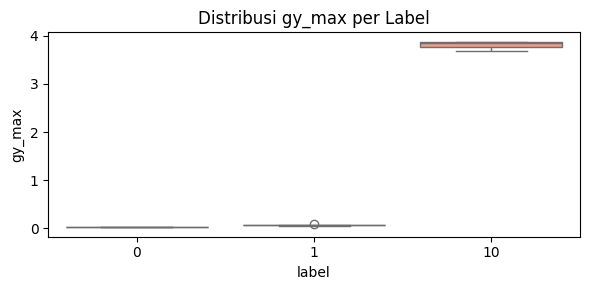

/var/folders/lt/2mkl6ry53ll9fdk2br6skfgw0000gn/T/ipykernel_19222/232653088.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=col, data=df_features, palette='coolwarm')


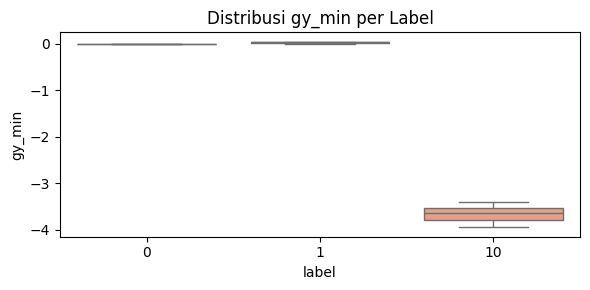

/var/folders/lt/2mkl6ry53ll9fdk2br6skfgw0000gn/T/ipykernel_19222/232653088.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=col, data=df_features, palette='coolwarm')


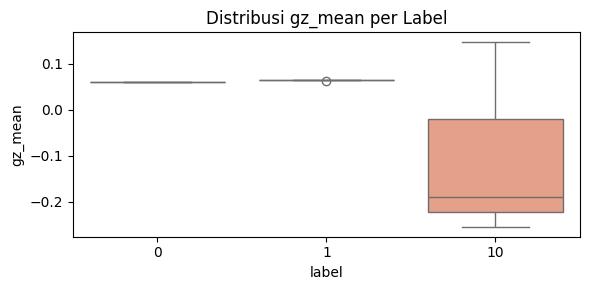

/var/folders/lt/2mkl6ry53ll9fdk2br6skfgw0000gn/T/ipykernel_19222/232653088.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=col, data=df_features, palette='coolwarm')


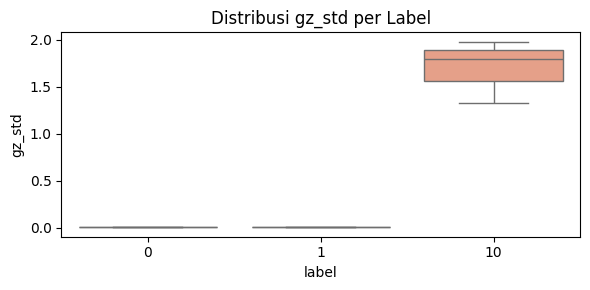

/var/folders/lt/2mkl6ry53ll9fdk2br6skfgw0000gn/T/ipykernel_19222/232653088.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=col, data=df_features, palette='coolwarm')


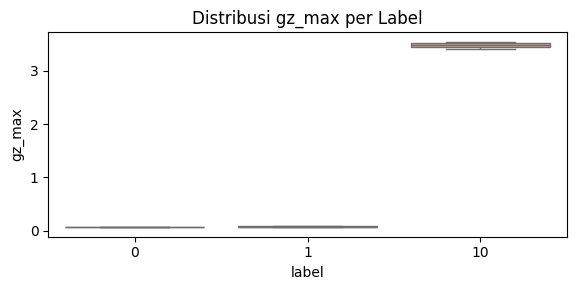

/var/folders/lt/2mkl6ry53ll9fdk2br6skfgw0000gn/T/ipykernel_19222/232653088.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=col, data=df_features, palette='coolwarm')


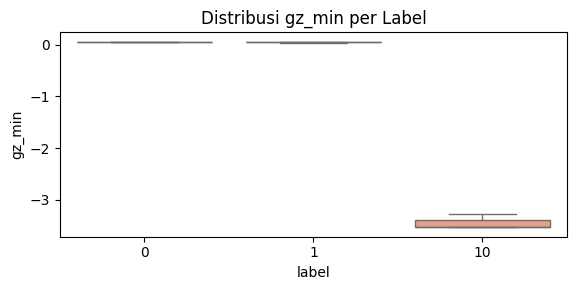

In [19]:
for col in df_features.columns:
    if col != 'label':
        plt.figure(figsize=(6, 3))
        sns.boxplot(x='label', y=col, data=df_features, palette='coolwarm')
        plt.title(f'Distribusi {col} per Label')
        plt.tight_layout()
        plt.show()


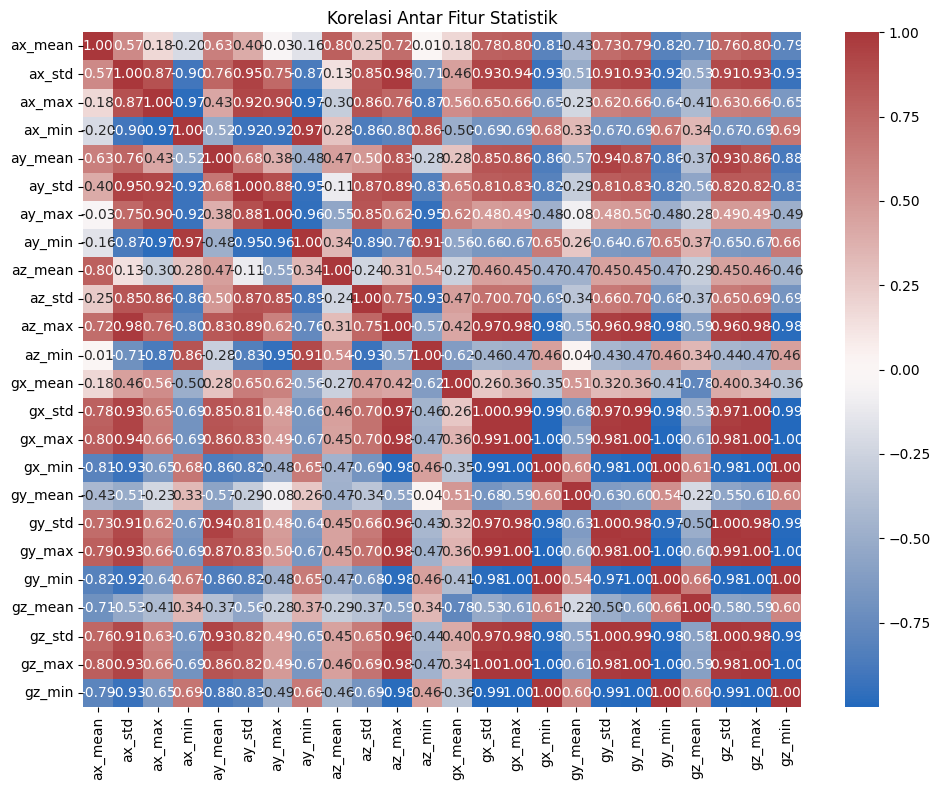

In [20]:
corr = df_features.drop(columns='label').corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='vlag', fmt=".2f")
plt.title("Korelasi Antar Fitur Statistik")
plt.tight_layout()
plt.show()


In [21]:
import pandas as pd
import numpy as np

# Load data dari file
df = pd.read_csv("data_imu_oke.csv")
kanal_imu = ['ax', 'ay', 'az', 'gx', 'gy', 'gz']


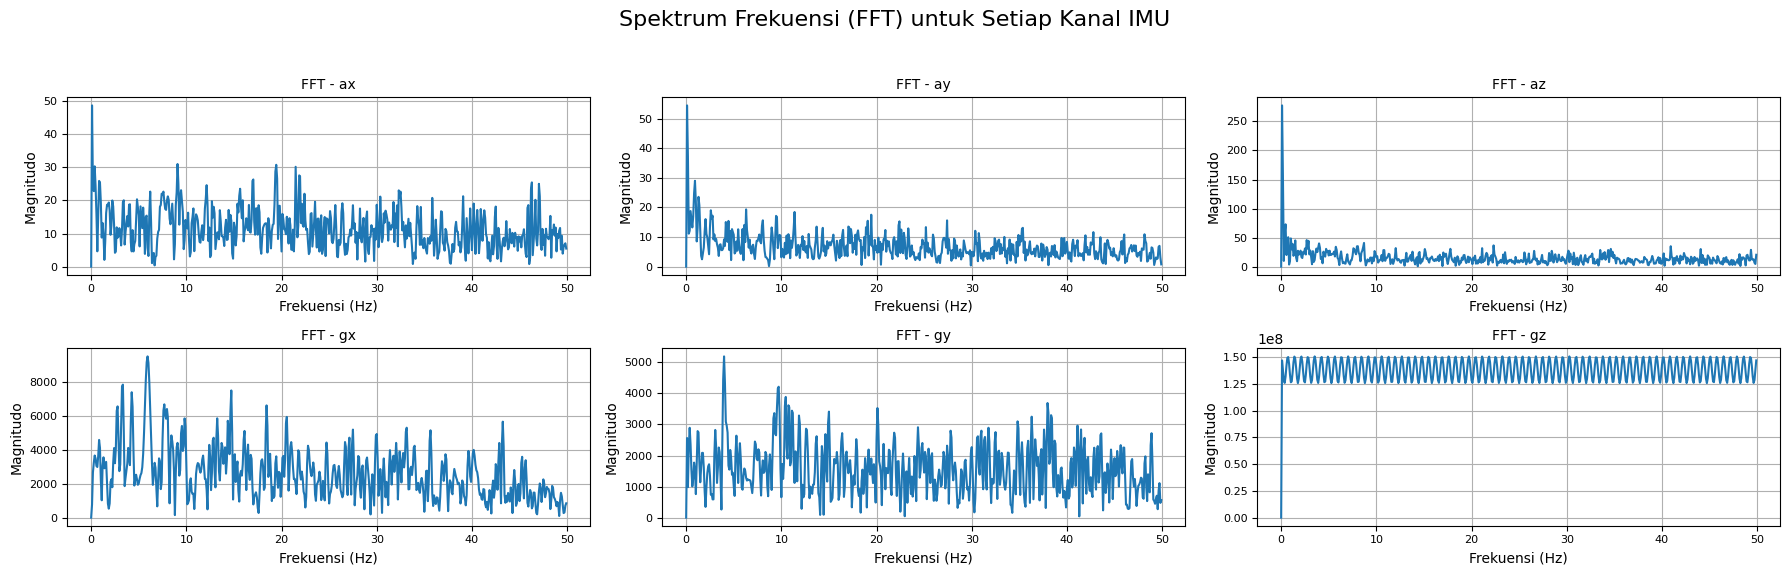

In [22]:
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

fs = 100  # Sampling rate (misal 100 Hz), sesuaikan jika berbeda
n = len(df)

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 6))
fig.suptitle("Spektrum Frekuensi (FFT) untuk Setiap Kanal IMU", fontsize=16)

for i, kanal in enumerate(kanal_imu):
    # Hilangkan offset mean dan lakukan FFT
    signal = df[kanal].values - np.mean(df[kanal].values)
    y_fft = np.abs(fft(signal))[:n//2]
    freq = fftfreq(n, 1/fs)[:n//2]

    axs[i//3, i%3].plot(freq, y_fft, color='tab:blue')
    axs[i//3, i%3].set_title(f"FFT - {kanal}", fontsize=10)
    axs[i//3, i%3].set_xlabel("Frekuensi (Hz)")
    axs[i//3, i%3].set_ylabel("Magnitudo")
    axs[i//3, i%3].grid(True)
    axs[i//3, i%3].tick_params(labelsize=8)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig("fft_imu_channels.png", dpi=300)
plt.show()


In [23]:
print(df.columns.tolist())


['ax', 'ay', 'az', 'gx', 'gy', 'gz', 'label']


In [27]:
import numpy as np

def sliding_window(data, window_size=128, step_size=64):
    """
    Memecah data menjadi segmen dengan metode sliding window.

    Parameters:
    - data: np.array, bentuk [n_samples, n_features]
    - window_size: int, panjang setiap window
    - step_size: int, langkah perpindahan window

    Returns:
    - windows: np.array, bentuk [n_windows, window_size, n_features]
    """
    n_samples, n_features = data.shape
    windows = []

    for start in range(0, n_samples - window_size + 1, step_size):
        end = start + window_size
        segment = data[start:end, :]
        windows.append(segment)

    return np.array(windows)


In [28]:
windows = sliding_window(X_raw, window_size=128, step_size=64)
print(f"Jumlah window: {windows.shape[0]}, Format: {windows.shape}")


NameError: name 'X_raw' is not defined

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

# Data & label
X = df_features.drop(columns='label').values
y = df_features['label'].values

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# ==== Model 1: SVM default ====
svm_default = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_default.fit(X_train, y_train)
y_pred_svm = svm_default.predict(X_test)

# Eval SVM
print("📌 SVM default")
print("Akurasi:", accuracy_score(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Report:\n", classification_report(y_test, y_pred_svm))


ValueError: The test_size = 2 should be greater or equal to the number of classes = 3

In [25]:
import numpy as np
labels, counts = np.unique(y, return_counts=True)
for label, count in zip(labels, counts):
    print(f"Label: {label} — Jumlah: {count}")


Label: 0 — Jumlah: 3
Label: 1 — Jumlah: 4
Label: 10 — Jumlah: 3


In [26]:
df_features['label'] = df_features['label'].replace({'kelasMinor': 'kelasMayor'})
